# **Advanced Data Science Lab-03**

Name: Gurvinder Kaur Matharu <br>
PRN: 20190802077

---

AIM:<br>
To Study And Perform Classification On Audio/Music Study.

In [1]:
import librosa
import librosa.display as dsp
from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data, sample_rate = librosa.load('Audio_file.wav',duration=60)
Audio(data=data,rate=sample_rate)

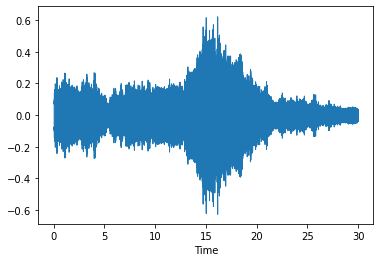

In [3]:
librosa.display.waveshow(data, sr=sample_rate)

A. Amplitude envelope and loudness -

In [4]:
sample_duration_classical = 1/sample_rate
duration_of_classical_signal = sample_duration_classical * len(data)
print(f"Duration of one sample is : {sample_duration_classical : .6f} seconds")
print(f"Duration of the audio signal is: {duration_of_classical_signal : .6f} seconds")

Duration of one sample is :  0.000045 seconds
Duration of the audio signal is:  30.000000 seconds


In [5]:
FRAME_SIZE = 1024
HOP_LENGTH =128
#Calculating the amplitude envelope
def amplitude_envelope(signal, frame_size, hop_length):
  return np.array([max(signal[i:i+frame_size]) for i in range(0, signal.size, hop_length)])

In [6]:
ae = amplitude_envelope(data, FRAME_SIZE, HOP_LENGTH)

In [7]:
ae

array([0.14065552, 0.14065552, 0.14065552, ..., 0.02828979, 0.02749634,
       0.02026367], dtype=float32)

In [8]:
frames = range(0, ae.size)
frames

range(0, 5168)

(-1.0, 1.0)

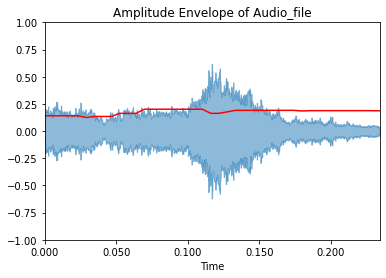

In [9]:
#visualizing Amplitude Envelope
frames = range(0, ae.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

librosa.display.waveplot(ae, alpha=0.5)
plt.plot(t, ae, color="r")
plt.title("Amplitude Envelope of Audio_file")
plt.ylim(-1,1)

##### B. Spectral centroid

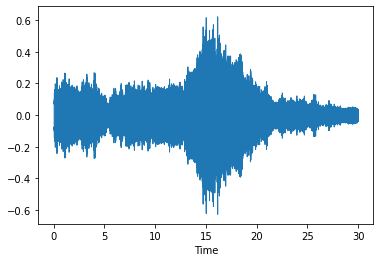

In [10]:
librosa.display.waveshow(data, sr=sample_rate)

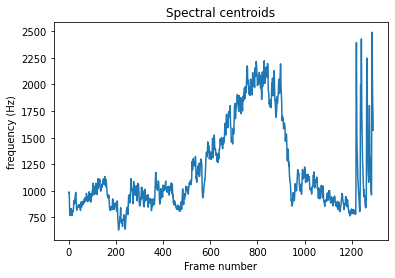

In [11]:
plt.plot(librosa.feature.spectral_centroid(data, sr=sample_rate)[0])
plt.xlabel('Frame number')
plt.ylabel('frequency (Hz)')
plt.title('Spectral centroids')
plt.show()

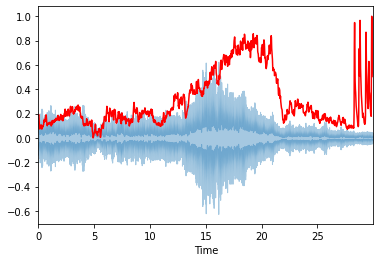

In [12]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(data, sr=sample_rate)[0]
spectral_centroids.shape
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(data, sr=sample_rate, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

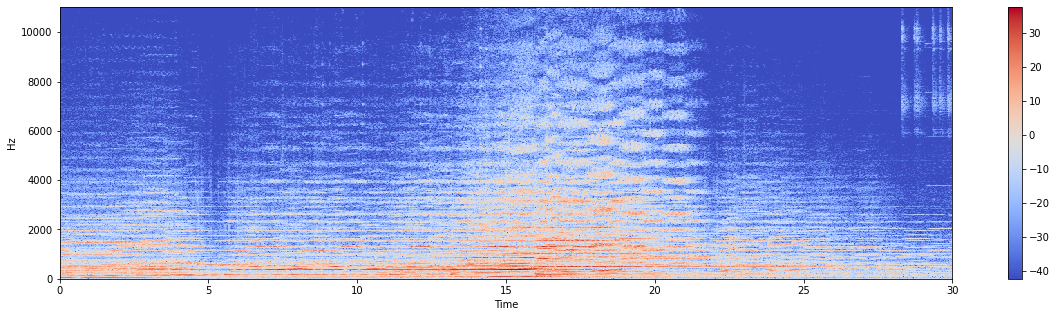

In [13]:
# Spectogram
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()

##### C. MFCC

In [14]:
mfccs = librosa.feature.mfcc(data, sr=sample_rate)
print(mfccs.shape)

(20, 1292)


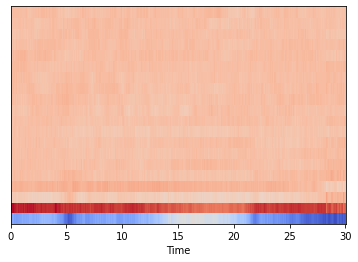

In [15]:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

##### D. Pitch salience

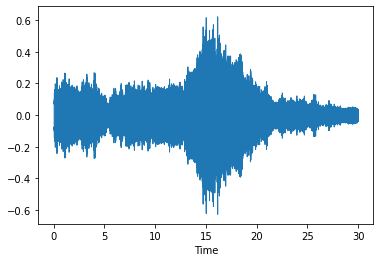

In [16]:
librosa.display.waveshow(data, sr=sample_rate)

In [17]:
y_third = librosa.effects.pitch_shift(data, sr=sample_rate, n_steps=-4)

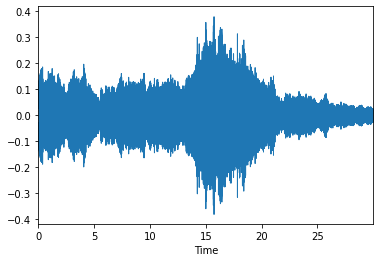

In [18]:
librosa.display.waveplot(y_third, sr=sample_rate)

##### E. Chroma

In [19]:
chroma = librosa.feature.chroma_stft(y=data, sr=sample_rate)

In [20]:
chroma

array([[0.4444896 , 0.29563138, 0.23942405, ..., 1.        , 1.        ,
        1.        ],
       [0.24860632, 0.16921867, 0.1030711 , ..., 0.18677554, 0.13008027,
        0.11394262],
       [0.77079856, 0.43362537, 0.25331077, ..., 0.264069  , 0.1928942 ,
        0.10198324],
       ...,
       [0.1632772 , 0.05194372, 0.03686681, ..., 0.88813144, 0.83360904,
        0.38856903],
       [0.45749483, 0.25425985, 0.23313238, ..., 0.55701536, 0.5883382 ,
        0.3593217 ],
       [1.        , 1.        , 1.        , ..., 0.43472394, 0.5627109 ,
        0.59813064]], dtype=float32)

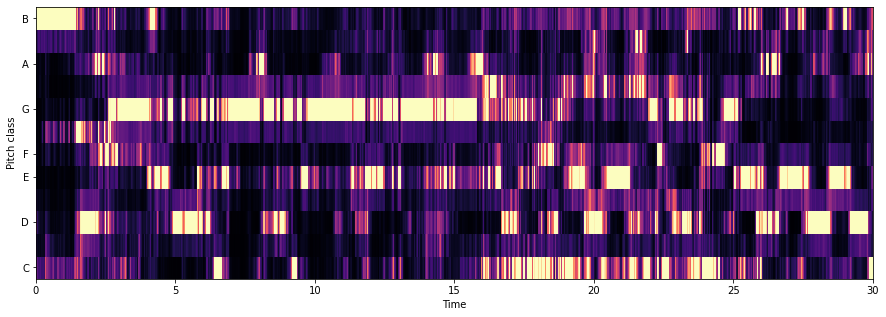

In [21]:
plt.figure(figsize=(15,5))
librosa.display.specshow(chroma, x_axis='time', y_axis='chroma')